# KNN Project Exercise 

Due to the simplicity of KNN for Classification, let's focus on using a PipeLine and a GridSearchCV tool, since these skills can be generalized for any model.


## The Sonar Data 

### Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.

<img src="sonar.jpg"  style="max-height: 500px; max-width: 500px;">

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine). 

<img src="mine.jpg"  style="max-height: 500px; max-width: 500px;">

Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

### Complete the Tasks in bold

**TASK: Run the cells below to load the data.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/mete/udemy/DATA/sonar.all-data.csv')

In [3]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

## Data Exploration

**TASK: Create a heatmap of the correlation between the difference frequency responses.**

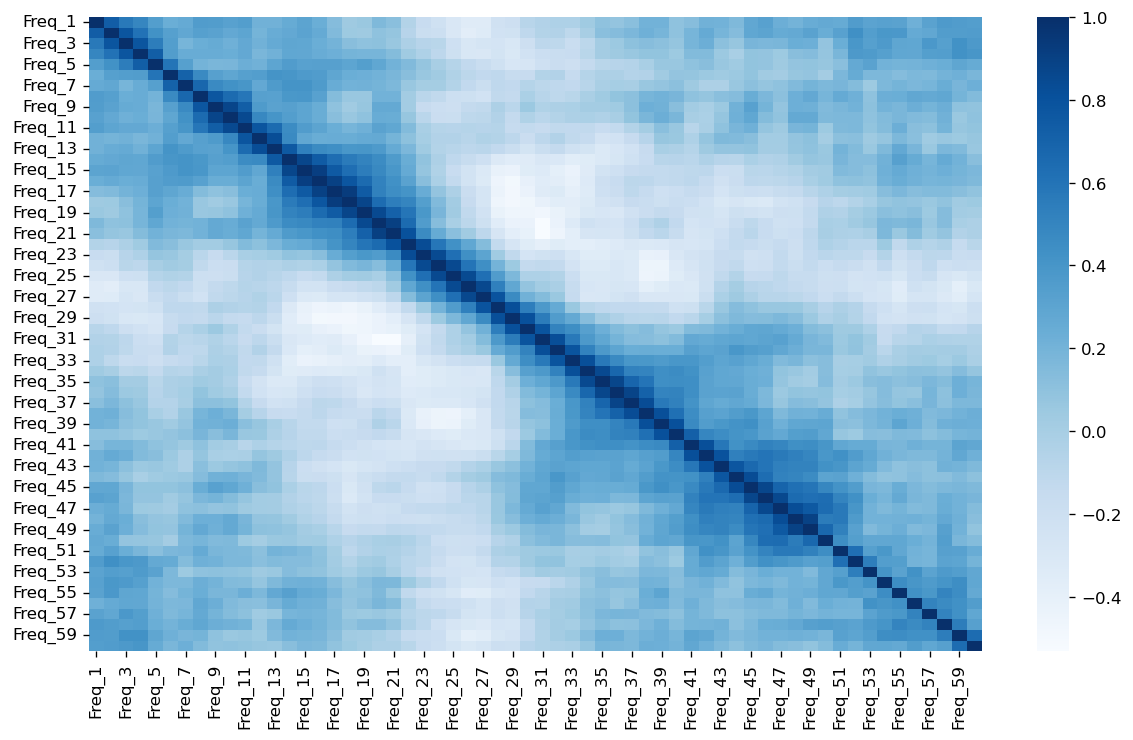

In [5]:
plt.figure(figsize=(12,7), dpi=120)
sns.heatmap(df.corr(), cmap="Blues");

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [6]:
# get_dummies values for label column
rock = pd.get_dummies(df["Label"], drop_first=True)
df_cor = df.drop("Label", axis=1)
df_cor = pd.concat([df_cor, rock], axis=1)

top_5 = abs(df_cor.corr()["R"]).sort_values().tail(6)
top_5

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
R          1.000000
Name: R, dtype: float64

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: The solution uses a random_state=42*

In [7]:
X = df.drop("Label", axis=1)
y = df["Label"]

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# splitting 10 percent test set aside
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# splitting other to train and validate data set
X_train, X_val, y_train, y_val = train_test_split(X_other, y_other, test_size=0.3, random_state=42)

**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
knn = KNeighborsClassifier()
param_grid = {"knn__n_neighbors":list(range(1,30))}
pipe = Pipeline([("scaler", scaler), ("knn", knn)])

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [9]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=pipe, cv=5, scoring="accuracy", param_grid=param_grid)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [10]:
params = grid.best_estimator_.get_params()
params

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

In [11]:
# scores per K values
scores = list()
for i in range(5):
    scores.append(grid.cv_results_['split%i_test_score' %i])

scores = pd.DataFrame(scores)
scores

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.807692,0.769231,0.692308,0.769231,0.730769,0.769231,0.692308,0.653846,0.653846,0.730769,...,0.538462,0.538462,0.500000,0.538462,0.615385,0.576923,0.576923,0.538462,0.538462,0.576923
1,0.769231,0.692308,0.653846,0.576923,0.576923,0.576923,0.538462,0.538462,0.615385,0.692308,...,0.846154,0.807692,0.846154,0.807692,0.769231,0.807692,0.807692,0.807692,0.807692,0.769231
2,0.923077,0.769231,0.807692,0.730769,0.730769,0.730769,0.769231,0.730769,0.730769,0.730769,...,0.730769,0.730769,0.692308,0.730769,0.769231,0.769231,0.730769,0.769231,0.730769,0.730769
3,0.846154,0.615385,0.653846,0.615385,0.653846,0.653846,0.692308,0.653846,0.730769,0.692308,...,0.615385,0.653846,0.653846,0.653846,0.692308,0.692308,0.653846,0.692308,0.615385,0.653846
4,0.884615,0.730769,0.730769,0.692308,0.807692,0.692308,0.769231,0.692308,0.730769,0.730769,...,0.769231,0.615385,0.653846,0.730769,0.692308,0.730769,0.730769,0.692308,0.692308,0.615385


In [12]:
# mean per kvalues
plot_data = np.array(scores.describe().loc["mean"])
plot_data

array([0.84615385, 0.71538462, 0.70769231, 0.67692308, 0.7       ,
       0.68461538, 0.69230769, 0.65384615, 0.69230769, 0.71538462,
       0.7       , 0.68461538, 0.70769231, 0.67692308, 0.71538462,
       0.68461538, 0.72307692, 0.67692308, 0.70769231, 0.7       ,
       0.66923077, 0.66923077, 0.69230769, 0.70769231, 0.71538462,
       0.7       , 0.7       , 0.67692308, 0.66923077])

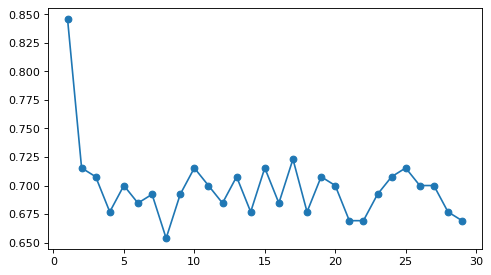

In [13]:
# plotting out accuracy scores per k values
plt.figure(figsize=(7,4), dpi=80)
ax = plt.plot(np.arange(1,30), plot_data, "o-")


### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [14]:
grid.fit(X_other, y_other)
pre = grid.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pre))

[[12  1]
 [ 1  7]]


In [15]:
print(classification_report(y_test, pre))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

